In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

In [2]:
TRAIN_SET = 'data/heart_disease-uci/heart-disease.csv'
# VALID_SET = using cross validation
# TEST_SET = to be extracted from TRAIN_SET

### Helper Functions

In [3]:
def classification_fit(X_train, X_test, y_train, y_test):
    models = {'Logistic Regression': LogisticRegression(),
             'KNN': KNeighborsClassifier(),
             'Random Forest': RandomForestClassifier()}
    
    np.random.seed(42)
    classification_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        classification_scores[name] = model.score(X_test, y_test)
    return classification_scores

In [4]:
def model_evaluate(model, X, y):
    evaluations = {'accuracy', 'precision', 'recall', 'f1'}

    for evaluation in evaluations:
        cv = cross_val_score(model,
                             X,
                             y,
                             scoring=evaluation)
    
        print(f'{evaluation}: {np.mean(cv)}')

### Training Set

In [5]:
# Initial import training set
df = pd.read_csv(TRAIN_SET,
                nrows=100)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   sex       100 non-null    int64  
 2   cp        100 non-null    int64  
 3   trestbps  100 non-null    int64  
 4   chol      100 non-null    int64  
 5   fbs       100 non-null    int64  
 6   restecg   100 non-null    int64  
 7   thalach   100 non-null    int64  
 8   exang     100 non-null    int64  
 9   oldpeak   100 non-null    float64
 10  slope     100 non-null    int64  
 11  ca        100 non-null    int64  
 12  thal      100 non-null    int64  
 13  target    100 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 11.1 KB


In [7]:
# Import training set
df = pd.read_csv(TRAIN_SET)

In [8]:
df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


In [9]:
(df.isna().sum() / len(df))[:100]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

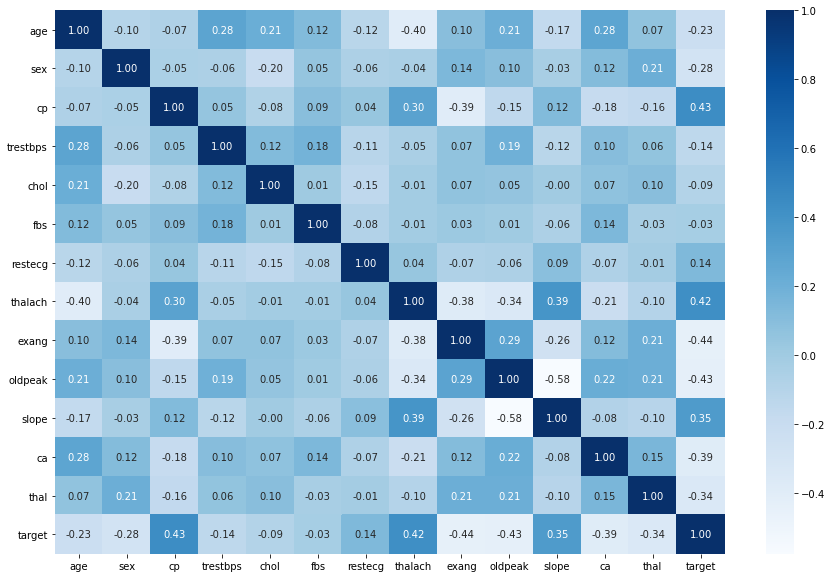

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr()
                ,annot=True
                ,fmt='.2f'
                ,cmap='Blues');

In [11]:
# Split data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Baseline Model

In [12]:
classification_scores = classification_fit(X_train, X_test, y_train, y_test)
classification_scores

C:\data\repo\machine-learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameters Tuning

In [13]:
# Bruteforce hyperparameters tuning for Logistic Regression
param = {'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear']}

model_lr = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions= param,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True,
                                  random_state=42)
model_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [14]:
model_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [15]:
model_lr.score(X_test, y_test)

0.8852459016393442

In [16]:
# Bruteforce hyperparameters tuning for KNN
test_scores = []

neighbors = range(1, 21)
model_knn = KNeighborsClassifier()
for neighbor in neighbors:
    model_knn.set_params(n_neighbors=neighbor)
    model_knn.fit(X_train, y_train)
    test_scores.append(model_knn.score(X_test, y_test))

In [17]:
# best param
test_scores.index(max(test_scores)) + 1

11

In [18]:
max(test_scores)

0.7540983606557377

In [19]:
param = {'n_estimators': np.arange(10, 1000, 50),
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': np.arange(2, 20, 2),
        'min_samples_leaf': np.arange(1, 20, 2)}

model_rf = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=param,
                             cv=5,
                             n_iter=20,
                             verbose=True,
                             random_state=42)
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [20]:
model_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [21]:
model_rf.score(X_test, y_test)

0.8688524590163934

In [22]:
# Select Logistic Regression model for prediction
model = LogisticRegression(C=model_lr.best_params_['C'],
                              solver=model_lr.best_params_['solver'])

model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

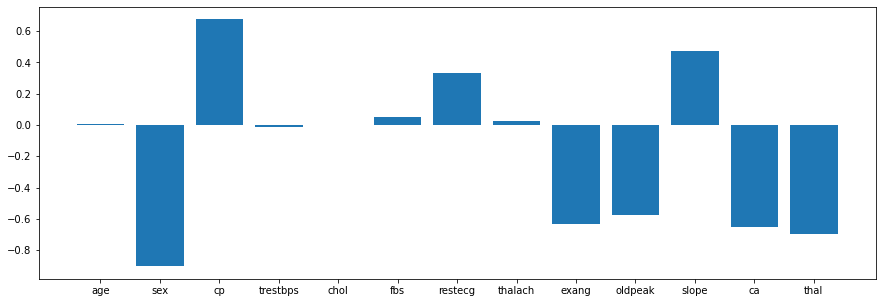

In [23]:
feature_importance = (pd.DataFrame({
                        'features': df.drop('target', axis=1).columns,
                        'importance': list(model.coef_[0])}))

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(feature_importance['features'], feature_importance['importance']);

In [24]:
# Exhaustive hyperparameters tuning for Logistic Regression
param = {'C': np.logspace(-4, 4, 30),
        'solver': ['liblinear']}

model = GridSearchCV(LogisticRegression(),
                       param_grid=param,
                       cv=5,
                       verbose=True)

model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [25]:
model.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [26]:
model.score(X_test, y_test)

0.8852459016393442

In [27]:
model = LogisticRegression(C=model.best_params_['C'],
                              solver=model.best_params_['solver'])

model.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [28]:
model_evaluate(model, X, y)

accuracy: 0.8446994535519124
recall: 0.9212121212121213
precision: 0.8207936507936507
f1: 0.8673007976269721


### Test Set

In [29]:
y_pred = model.predict(X_test)

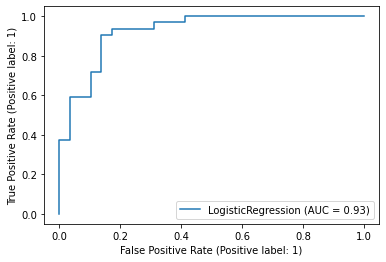

In [30]:
plot_roc_curve(model, X_test, y_test);

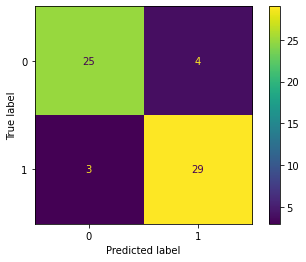

In [31]:
plot_confusion_matrix(model, X_test, y_test);

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

